In [1]:
#imports and initialize loggers (class that code will call on?)
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

logger = phoebe.logger()

b = phoebe.default_binary(contact_binary=True) #this sets to the default data, and can add "contact_binary=True" but not necessary
b.add_dataset('lc', times=np.linspace(6589.5,6590.5,200), dataset='mylc') #adding time for LC
#overwrite
#b.add_dataset(phoebe.dataset.orb, times=np.linspace(0,10,20), dataset='orb01', component=['primary', 'secondary'])
#now we want to find a way to convert the epochs / have it start at a certain time

PHOEBE: passband "Bolometric:900-40000" has a newer version available.  Run phoebe.list_passband_online_history("Bolometric:900-40000") to get a list of available changes and phoebe.update_passband("Bolometric:900-40000") or phoebe.update_all_passbands() to update.
PHOEBE: passband "Johnson:V" has a newer version available.  Run phoebe.list_passband_online_history("Johnson:V") to get a list of available changes and phoebe.update_passband("Johnson:V") or phoebe.update_all_passbands() to update.


ValueError: not enough values to unpack (expected 2, got 0)

In [19]:
b.add_dataset('mesh', compute_times=[0], dataset='mesh01')
b.add_dataset('orb', compute_times=np.linspace(0,1,201), dataset='orb01')
b.add_dataset('lc', times=np.linspace(0,1,21), dataset='lc01')
b.add_dataset('rv', times=np.linspace(0,1,21), dataset='rv01')


<ParameterSet: 94 parameters | contexts: compute, constraint, dataset, figure>

In [20]:
b.run_compute(irrad_method='none')

100%|██████████| 205/205 [00:01<00:00, 168.94it/s]


<ParameterSet: 31 parameters | kinds: rv, lc, mesh, orb>

In [21]:
print(b['mesh01@model'].components)
#b is our binary with many components. Mesh is a category of it with variables associated with it, and the @ is like a .
#primary and secondary stars

['primary', 'secondary']


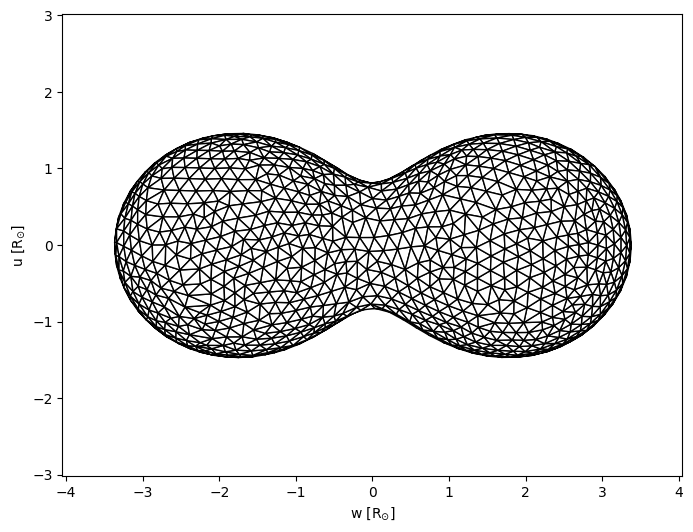

In [22]:
afig, mplfig = b['mesh01@model'].plot(x='ws', show=True)
#they're gonna generate data at each polygon

## Orbit

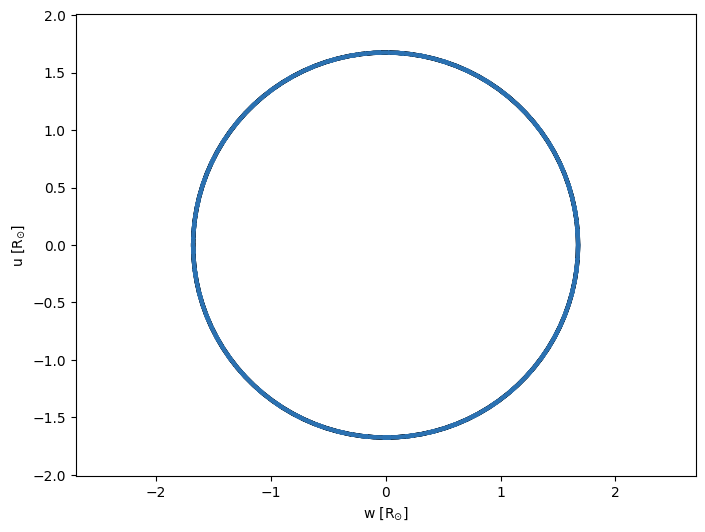

In [23]:
afig, mplfig = b['orb01@model'].plot(x='ws',show=True)

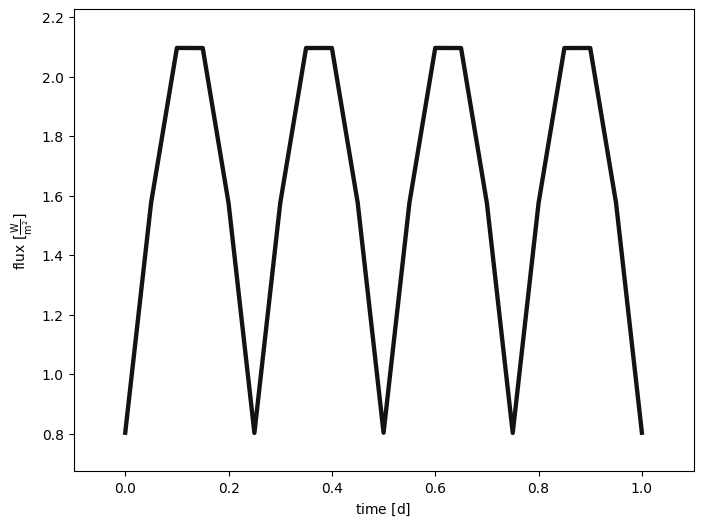

In [24]:
afig, mplfig = b['lc01@model'].plot(show=True)

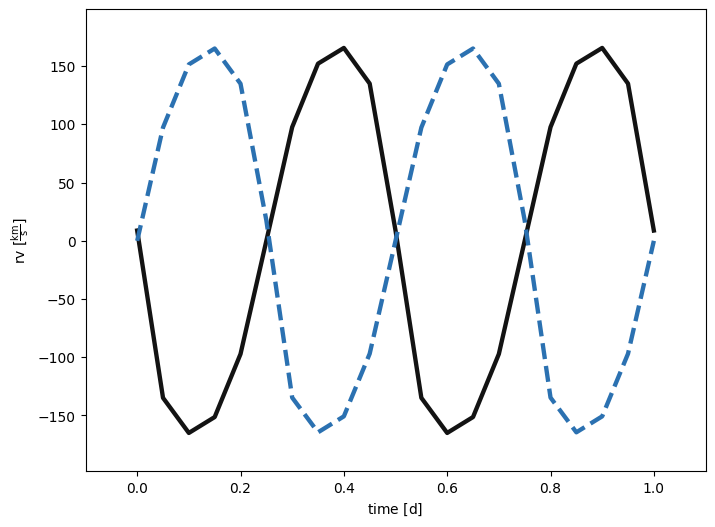

In [25]:
afig, mplfig = b['rv01@model'].plot(show=True)

In [29]:
print(b.hierarchy)
#tryna add another star
#b.add_star('newstar',teff=6000)


    orbit:binary
    
        star:primary
        star:secondary
        envelope:contact_envelope
    



In [ ]:
#b.add_orbit()

<ParameterSet: 18 parameters | qualifiers: t0_perpass, sma, asini, dperdt, period, period_anom, t0_ref, incl, t0_supconj, esinw, long_an, dpdt, ecc, freq, mean_anom, q, per0, ecosw>

In [27]:
#afig, mplfig = b['orb01@model'].plot(x='ws',show=True)